<a href="https://colab.research.google.com/github/BinarySstar/Credit-Card-Segment-Classfication/blob/master/Credit_Card_Segment_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive Mount
train 및 test 데이터를 drive에 저장하기 위해 mount를 진행

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 한글 폰트 적용을 위해 폰트 설치 및 적용

In [2]:
# 한글 폰트 설정 (Colab용)
!apt-get -qq install -y fonts-nanum

# matplotlib 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
!fc-list :lang=ko

/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGothic,나눔바른고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf: NanumGothic,나눔고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf: NanumSquare,나눔스퀘어:style=Regular
/us

# EDA
## 데이터 로드
- parquet 형식의 데이터를 로드

In [4]:
#!pip install fastparquet

- 전체 parquet 파일에 대한 요약

In [5]:
# import pandas as pd
# import os
# from glob import glob

# # Google Drive 경로 설정
# base_path = "drive/MyDrive/고급프로그래밍/train"

# # 폴더 이름 정의
# folder_name = ["회원정보", "신용정보", "승인매출정보", "청구입금정보", "잔액정보", "채널정보", "마케팅정보", "성과정보"]
# folders = [f"{i}.{name}" for i, name in enumerate(folder_name, start=1)]

# # 요약 결과를 정리하는 list
# summary_list = []

# for folder in folders:
#     folder_path = os.path.join(base_path, folder)
#     parquet_files = glob(os.path.join(folder_path, "*.parquet"))

#     for file in parquet_files:
#         try:
#             df = pd.read_parquet(file, engine="fastparquet")

#             info = {
#                 "폴더명": folder,
#                 "파일명": file,
#                 "행 수": df.shape[0],
#                 "열 수": df.shape[1],
#                 "컬럼 목록": df.columns.tolist(),
#                 "데이터 타입": df.dtypes.to_dict(),
#                 "결측치 비율": df.isnull().mean().to_dict(),
#                 "샘플 데이터": df.head().to_dict()
#             }

#             summary_list.append(info)
#             print(f"✅ {file} 로드 완료")

#         except Exception as e:
#             print(f"❌ {file} 처리 중 오류: {e}")

# # 결과 DataFrame으로 정리
# summary_df = pd.DataFrame(summary_list)
# summary_df

- 모든 parquet 파일의 row는 400000개, column은 카테고리 별로 동일하다.
  - EDA를 수행할 때 메모리 효율성과 속도를 고려한 분석 전략이 중요하다.
- 카테고리 별로 column의 데이터 타입과 의미가 동일하다.


## 세그먼트 불균형 확인
- 전체 Segment(A~E)의 데이터 불균형 정도 확인
- 월별 Segment 분포 변화 확인하여 시계열 성격 확인
- 각 Segment별 고객 수 비율 및 월별 증감 여부 파악

Segment
A       162
B        24
C     21265
D     58207
E    320342
Name: count, dtype: int64
Segment
A    0.000405
B    0.000060
C    0.053163
D    0.145517
E    0.800855
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


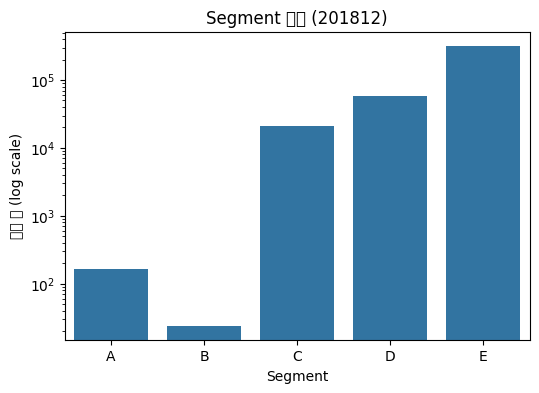

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


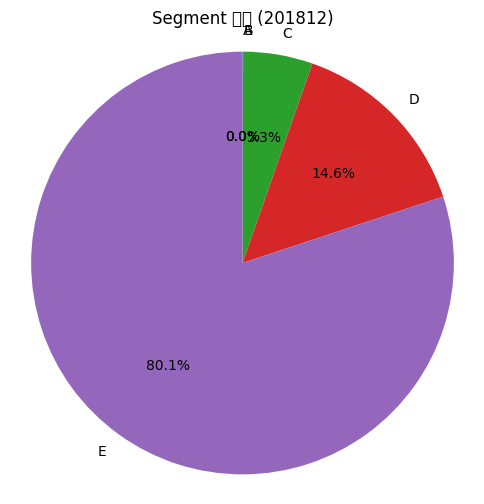

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 회원정보 데이터 불러오기 (201812 기준)
file_path = "/content/drive/MyDrive/고급프로그래밍/train/1.회원정보/201812_train_회원정보.parquet"
df = pd.read_parquet(file_path)

# Segment 분포 확인
segment_counts = df["Segment"].value_counts().sort_index()
print(segment_counts)

print("=========================")
segment_ratio = df["Segment"].value_counts(normalize=True).sort_index()
print(segment_ratio)

# 수 확인
plt.figure(figsize=(6,4))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.yscale("log")
plt.title("Segment 분포 (201812)")
plt.ylabel("고객 수 (log scale)")
plt.xlabel("Segment")
plt.show()

# 비율 확인
plt.figure(figsize=(6,6))
plt.pie(segment_ratio, labels=segment_ratio.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Segment 비율 (201812)")
plt.axis('equal')
plt.show()

### 🔍 분석
- 극심한 클래스 불균형이 존재함.
  - Segment E 하나가 전체 고객의 80% 이상 차지
  - Segment A, B는 희소 클래스 (합쳐도 전체의 0.05% 수준)
  - 로그 스케일로 표현했기 때문에 A/B가 보이지만, 실제로는 거의 사라지는 수준

- A, B 세그먼트는 중요한 VIP 혹은 고위험군 고객을 분류하는 세그먼트일 가능성이 높다.

> 👉 모델 학습 시 Segment A와 B를 예측하는 것이 매우 어려우며, 모델이 Segment E에 편향될 위험이 큼. 모델링 시 소수 클래스 예측을 위한 특수한 처리가 필수

## 세그먼트 별 고객 특성 확인
- 고객의 기본 프로필(성별, 연령, 회원등급 등)이 Segment 간 어떤 차이를 보이는지 파악
- 특정 Segment가 어떤 고객군을 대표하는지 추론

In [7]:
# df의 column 확인
df.columns

Index(['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA',
       '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용',
       '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM',
       '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부',
       '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족',
       '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크',
       '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크',
       '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
       '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수',
       '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',
       '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인',
       '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인',
       '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M',
 

- column이 너무 많아 모든 column에 대해 분석하기는 어려움
- 핵심 column 일부를 이용하여 세그먼트 분석 진행

| 항목 | 변수명 | 분석 방식 |
|------|---|---|
|🎂 연령 | 연령 | Boxplot, 평균 비교|
👨‍👩‍👧 성별 | 남녀구분코드 | Countplot (hue by Segment)
🎓 회원 등급/이용 가능 여부 | 회원여부_이용가능, 회원여부_이용가능_CA, 회원여부_이용가능_카드론 | Countplot
💳 카드 보유 수 | 소지카드수_유효_신용, 소지카드수_이용가능_신용 | 평균 비교
🕒 카드 사용 경과 | 입회경과개월수_신용, 최종카드발급경과월 | Boxplot
📩 마케팅 수신 동의 여부 | 마케팅동의여부 | 비율 비교
🧓 Life Stage | Life_Stage | Countplot (Segment별 분포)

### 🎂 세그먼트 별 연령 분석

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

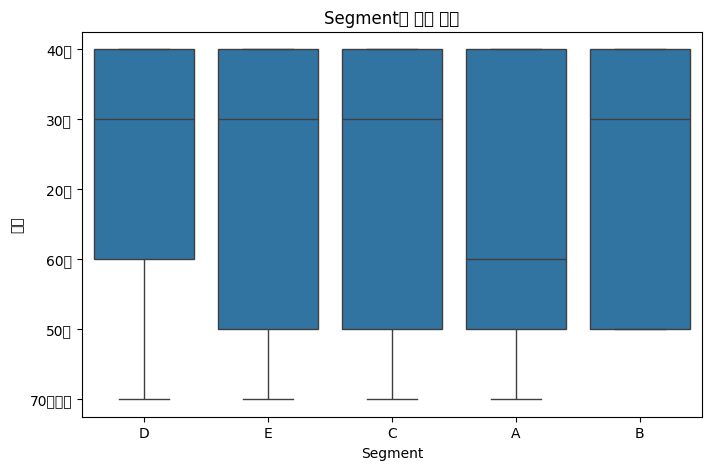

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Segment', y='연령', data=df)
plt.title("Segment별 연령 분포")
plt.xlabel("Segment")
plt.ylabel("연령")
plt.show()

🧠 설명:

- 각 Segment 그룹의 연령 중앙값, 범위, 이상치를 확인
- AE 그룹 중 고령층 중심인지, 또는 **2030대 중심인지** 파악 가능

🔍 활용 예시:

- Segment A: 평균 연령 높으면 장기 고객
- Segment E: 젊은 고객 비중 높다면 신규 또는 저위험군

### 👨‍👩‍👧 세그먼트 별 성별 분포

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

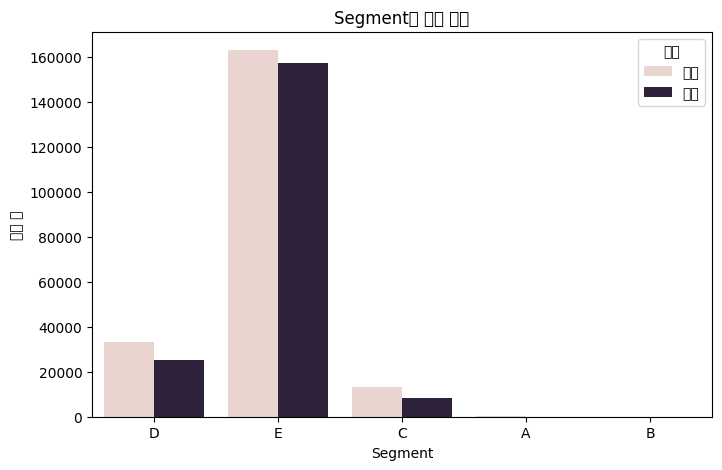

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segment', hue='남녀구분코드', data=df)
plt.title("Segment별 성별 분포")
plt.xlabel("Segment")
plt.ylabel("고객 수")
plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

🧠 설명:

- 각 Segment에서 남성과 여성의 비율 확인
- 특정 Segment에 여성 고객이 많다면 마케팅 타겟에 활용 가능

🔍 해석 포인트:

- Segment D가 여성 중심이라면 → 여성 대상 혜택 반응이 클 수도 있음

### 💳 Segment별 회원 이용 가능 여부

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

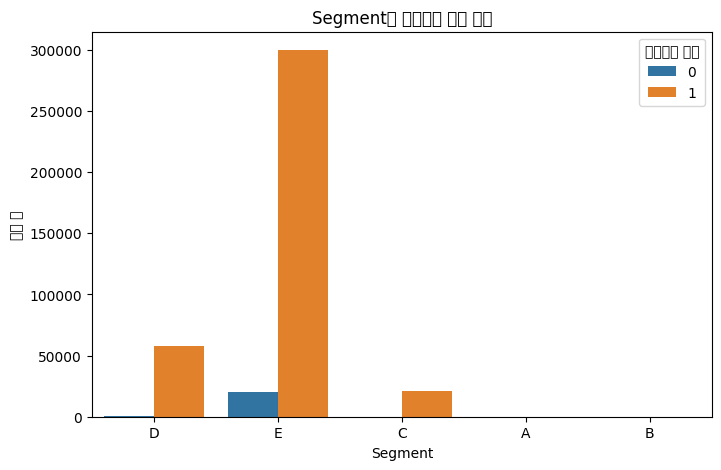

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segment', hue='회원여부_이용가능', data=df)
plt.title("Segment별 이용가능 여부 분포")
plt.xlabel("Segment")
plt.ylabel("고객 수")
plt.legend(title="이용가능 여부")
plt.show()

🧠 설명:
- 고객이 블랙리스트로 등재되지 않았는지 여부
- Segment E에 이용 불가능 비율이 높다면 → 위험군 고객

### 💳 유효/이용가능 신용카드 수 평균

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

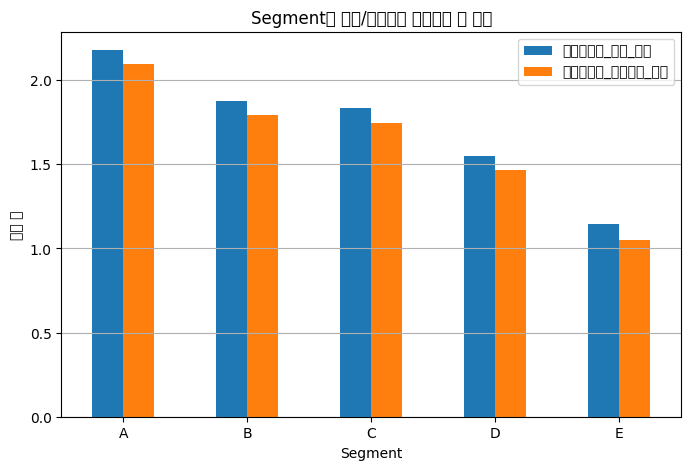

In [11]:
card_stats = df.groupby('Segment')[['소지카드수_유효_신용', '소지카드수_이용가능_신용']].mean()
card_stats.plot(kind='bar', figsize=(8,5))
plt.title("Segment별 유효/이용가능 신용카드 수 평균")
plt.ylabel("카드 수")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

🧠 설명:

- Segment별 카드 소지 및 실제 사용 가능 수 비교
- A~C 그룹은 카드 수가 많고, E는 적을 가능성 있음

### ⏱ Segment별 카드 입회 경과 개월 수

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

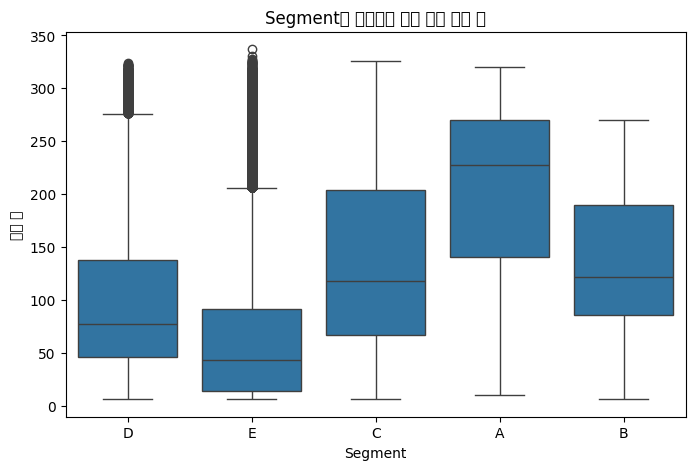

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Segment', y='입회경과개월수_신용', data=df)
plt.title("Segment별 신용카드 입회 경과 개월 수")
plt.xlabel("Segment")
plt.ylabel("개월 수")
plt.show()

🧠 설명:

- 장기 고객과 신규 고객을 나누는 지표
- A는 오래된 고객, E는 신규일 가능성?

### 📩 Segment별 마케팅 동의율

In [13]:
marketing_rate = df.groupby("Segment")["마케팅동의여부"].mean()
print(marketing_rate)

Segment
A    0.753086
B    0.875000
C    0.754667
D    0.777175
E    0.818313
Name: 마케팅동의여부, dtype: float64


🧠 설명:
- 마케팅 수신 동의율이 높은 Segment는 고객 접촉 가능성 높음
- 마케팅 전략 수립에 활용 가능

### 👣 Segment별 생애주기 (Life Stage)

<ipython-input-14-1151e553a0e1>:8: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-1151e553a0e1>:8: UserWarning: Glyph 45376 (\N{HANGUL SYLLABLE NYEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-1151e553a0e1>:8: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-1151e553a0e1>:8: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-1151e553a0e1>:8: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-1151e553a0e1>:8: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-1151e553a0e1>:8: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-in

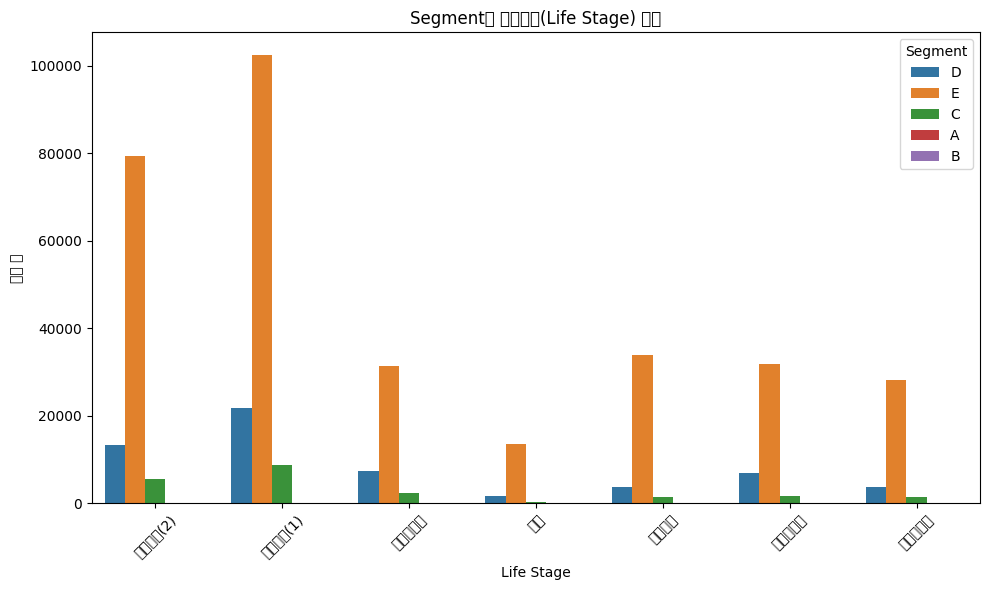

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='Life_Stage', hue='Segment', data=df)
plt.title("Segment별 생애주기(Life Stage) 분포")
plt.xlabel("Life Stage")
plt.ylabel("고객 수")
plt.xticks(rotation=45)
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

🧠 설명:

- Life Stage: 예) 대학생, 신입사회인, 자녀양육기, 은퇴 후 등
- Segment C는 직장 초기, D는 은퇴 후 등으로 구별 가능

🔍 활용 예시:

- 특정 Segment에 “자녀양육기” 고객이 많다면 → 육아 혜택 마케팅 연결 가능

# 결론
- 대용량 데이터를 사람이 직접 모든 요소를 분석하기에는 한계가 존재
- 머신러닝 모델을 이용하여 상관관계를 분석하여 예측 가능